In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast


In [24]:
df = pd.read_csv("tmdb_5000_movies.csv")


In [25]:
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [26]:
df['genres'] = df['genres'].apply(ast.literal_eval)



In [27]:
all_genres = []

for movie_genres in df['genres']:
    for genre in movie_genres:
        all_genres.append(genre['name'])


In [28]:
genres_array = np.array(all_genres)


In [29]:
genre_counts = pd.Series(genres_array).value_counts()


In [30]:
print(genre_counts)


Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: count, dtype: int64


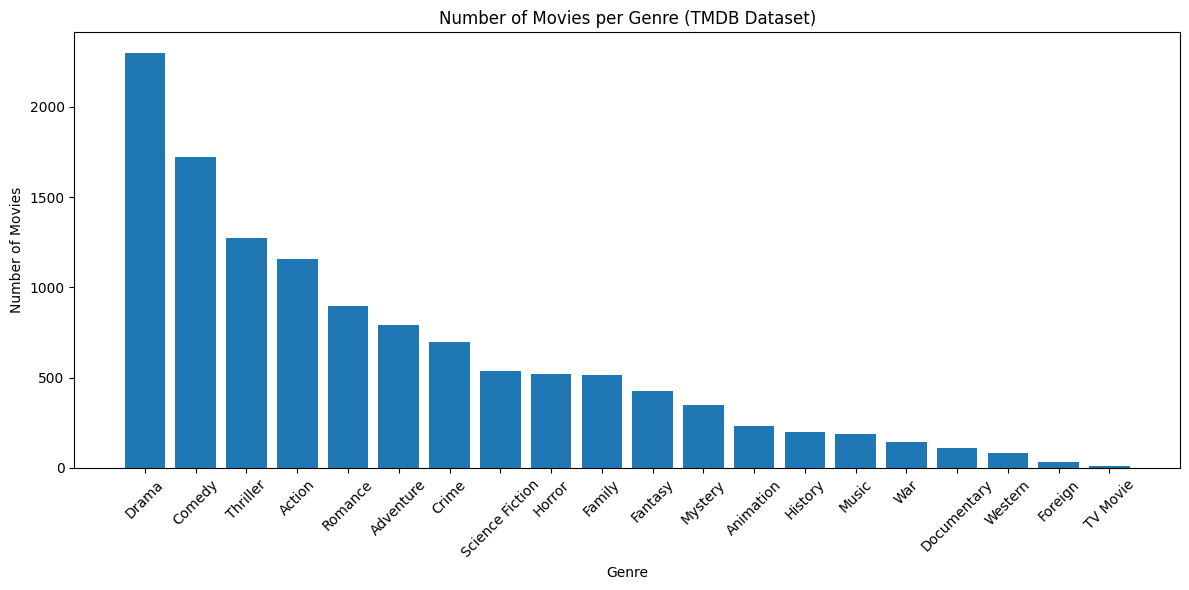

In [31]:
plt.figure(figsize=(12,6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Genre (TMDB Dataset)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Load datasets
# Clean movie ids safely
movies = movies[movies['id'].notna()]
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
movies = movies[movies['id'].notna()]
movies['id'] = movies['id'].astype(int)

credits['id'] = credits['id'].astype(int)
keywords['id'] = keywords['id'].astype(int)

links = links[links['tmdbId'].notna()]
links['tmdbId'] = links['tmdbId'].astype(int)


# 🔹 Use links.csv only to filter valid tmdb ids
valid_ids = set(links['tmdbId'])

movies = movies[movies['id'].isin(valid_ids)]

# 🔹 Merge only three datasets
master = movies.merge(credits, on='id')
master = master.merge(keywords, on='id')

# Output as required
print("Columns in Master Dataset:")
print(master.columns)

print("\nShape of Master Dataset:")
print(master.shape)


Columns in Master Dataset:
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

Shape of Master Dataset:
(46628, 27)


In [ ]:
## Feature Engineering for Content-Based Recommendation

In this section, movie metadata such as genres, keywords, cast, and crew
are processed and converted into clean textual features. These features
are later combined into a single representation for content-based
recommendation.


In [ ]:
import ast


In [ ]:
def extract_text_features(text):
    """
    Extracts 'name' values from a JSON-like string and returns
    a list of cleaned tokens.
    """
    if isinstance(text, str):
        try:
            parsed = ast.literal_eval(text)
            return [item['name'].replace(" ", "").lower() for item in parsed]
        except:
            return []
    return []


In [ ]:
def extract_main_cast(cast_text):
    """
    Extracts names of top 3 cast members from cast JSON.
    """
    if isinstance(cast_text, str):
        try:
            cast_list = ast.literal_eval(cast_text)
            main_cast = cast_list[:3]
            return [actor['name'].replace(" ", "").lower() for actor in main_cast]
        except:
            return []
    return []


In [ ]:
def extract_movie_director(crew_text):
    """
    Extracts director name from crew JSON.
    """
    if isinstance(crew_text, str):
        try:
            crew_list = ast.literal_eval(crew_text)
            for person in crew_list:
                if person.get('job') == 'Director':
                    return person['name'].replace(" ", "").lower()
        except:
            return ""
    return ""


In [ ]:
# Extract and clean metadata features
master['genres_cleaned'] = master['genres'].apply(extract_text_features)
master['keywords_cleaned'] = master['keywords'].apply(extract_text_features)
master['cast_cleaned'] = master['cast'].apply(extract_main_cast)
master['director_cleaned'] = master['crew'].apply(extract_movie_director)


In [ ]:
master[['title', 'tags']].head()
